In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("bengaluru_house_prices.csv")

In [3]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

In [4]:
data.drop(['area_type','availability','society','balcony'],axis='columns',inplace=True)
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [5]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
data.dropna(subset='location',inplace=True)

In [7]:
data.dropna(subset='size',inplace=True)

In [8]:
data['bath']=data.bath.fillna(data.bath.median())

In [9]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
data['bhk']=data['size'].apply(lambda x : int(x.split(' ')[0]))

In [11]:
data['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
data[data['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
data[~data['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [16]:
def conv_range_to_float(x):
    x=x.split('-')
    if len(x)==2:
        return (float(x[0])+float(x[1]))/2
    
    try:
        return float(x[0])
    except:
        return None

In [17]:
conv_range_to_float('1305-1315')

1310.0

In [18]:
conv_range_to_float('1305')

1305.0

In [19]:
conv_range_to_float('1305sqMeter')

In [20]:
data['total_sqft']=data['total_sqft'].apply(conv_range_to_float)

In [21]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [22]:
data.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [23]:
len(data['total_sqft'])

13303

In [24]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [25]:
data.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [26]:
data.dropna(subset='total_sqft',inplace=True)

In [27]:
len(data.location.unique())

1298

In [28]:
loc_stats=data.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield             537
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         271
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [29]:
len(loc_stats[loc_stats<=10])

1058

In [30]:
loc_less_than_10=loc_stats[loc_stats<=10]
loc_less_than_10

location
Dairy Circle            10
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Kalkere                 10
Naganathapura           10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1058, dtype: int64

In [31]:
data['location']=data['location'].apply(lambda x: 'other' if x in loc_less_than_10 else x )

In [32]:
len(data.groupby('location')['location'].agg('count'))

241

In [33]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [34]:
incorectData=data[data['total_sqft']/data['bhk']<300]
len(data[data['total_sqft']/data['bhk']<300])

744

In [35]:
data = data[data['total_sqft']/data['bhk']>=300]

In [36]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [37]:
data['price_per_sqft'].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [38]:
len(data)

12513

In [39]:
def rem_more_deviate_data(x):
    df_out=pd.DataFrame()
    for key,subf in x.groupby('location'):
        m=subf['price_per_sqft'].mean()
        sd=subf['price_per_sqft'].std()
        red=subf[(subf['price_per_sqft']>(m-sd)) & (subf['price_per_sqft']<(m+sd))]
        df_out=pd.concat([df_out,red],ignore_index=True)
        
    return df_out


data=rem_more_deviate_data(data)
len(data)

10340

(array([1.098e+03, 5.778e+03, 2.500e+03, 5.010e+02, 2.680e+02, 1.280e+02,
        4.000e+01, 1.700e+01, 5.000e+00, 5.000e+00]),
 array([ 1250.        ,  3575.98039216,  5901.96078431,  8227.94117647,
        10553.92156863, 12879.90196078, 15205.88235294, 17531.8627451 ,
        19857.84313725, 22183.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

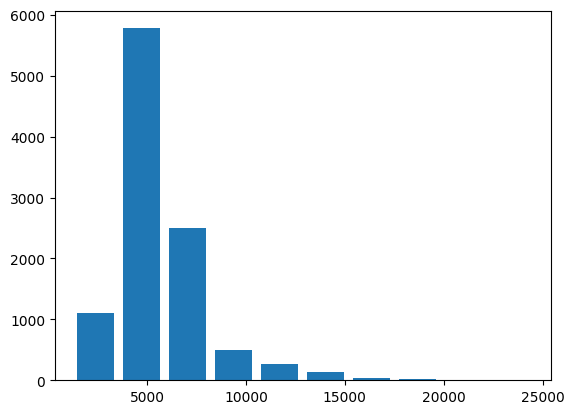

In [40]:
plt.hist(data['price_per_sqft'],rwidth=0.8)

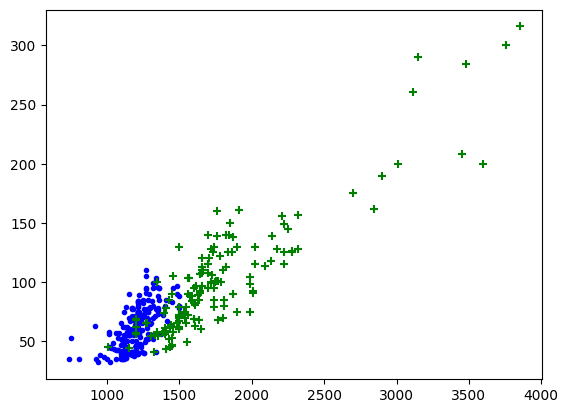

In [41]:
def draw_points(df,location):
    bhk2=df[(df['location']==location) & (df['bhk']==2)]
    bhk3=df[(df['location']==location) & (df['bhk']==3)]
    bhk2
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker='.')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+')
    
draw_points(data,'Whitefield')    

In [42]:
data.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
other                   2320
Whitefield               483
Sarjapur  Road           301
Electronic City          277
Kanakpura Road           196
                        ... 
HAL 2nd Stage              5
Marsur                     4
Vishveshwarya Layout       4
Vishwapriya Layout         4
Banjara Layout             4
Name: location, Length: 241, dtype: int64

In [43]:
def rem(df):
    newData=pd.DataFrame()
    for loc,subloc in df.groupby('location'):
        bhkdic={}
        for bhk,subbhk in subloc.groupby('bhk'):
            bhkdic[bhk]={
                'mean':subbhk['price_per_sqft'].mean()
            }
        for bhk2,subbhk2 in subloc.groupby('bhk'):
            keys=list(bhkdic.keys())
            if keys.index(bhk2)>0:
                stat=bhkdic.get(keys[keys.index(bhk2)-1])
                stat_mean=stat['mean']
                new=subbhk2[subbhk2['price_per_sqft']>=stat_mean]

                newData=pd.concat([newData, new],ignore_index=True)
            
            else:
                
                newData=pd.concat([newData, subbhk2],ignore_index=True)
            
    return newData        
                

In [44]:
data=rem(data)
data



,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
1,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
2,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
3,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
4,Devarachikkanahalli,2 BHK,1130.0,2.0,36.0,2,3185.840708
...,...,...,...,...,...,...,...
6209,other,8 BHK,3300.0,8.0,310.0,8,9393.939394
6210,other,9 BHK,4500.0,9.0,500.0,9,11111.111111
6211,other,10 Bedroom,3300.0,9.0,450.0,10,13636.363636
6212,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [45]:
data.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

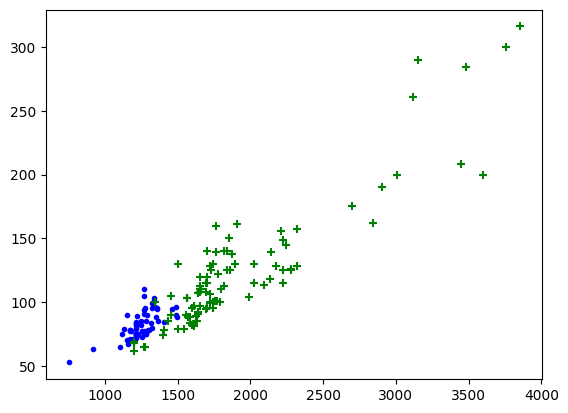

In [46]:
draw_points(data,'Whitefield') 

(array([ 344., 2819., 2181.,  438.,  250.,  121.,   38.,   14.,    4.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

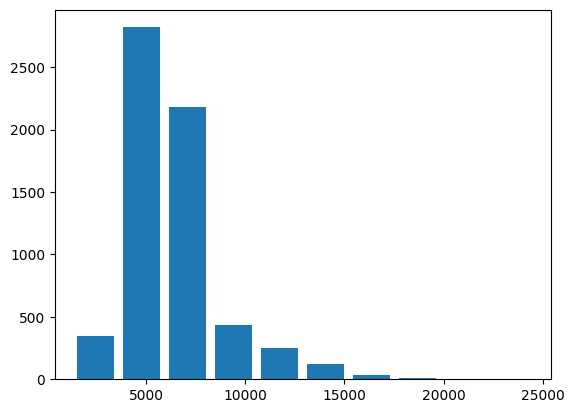

In [47]:
plt.hist(data['price_per_sqft'],rwidth=0.8)

In [48]:
data.drop(['price_per_sqft','size'],axis='columns',inplace=True)

In [49]:
len(data['location'].unique())

241

In [50]:
data[data['bath']>data['bhk']+1]

,location,total_sqft,bath,price,bhk
39,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6
438,BTM 2nd Stage,1260.0,5.0,185.0,3
569,Bannerghatta,3012.0,6.0,250.0,4
751,Begur Road,2464.5,6.0,118.0,4
819,Benson Town,3633.0,6.0,550.0,4
...,...,...,...,...,...
6154,other,3730.0,6.0,430.0,4
6157,other,6652.0,6.0,510.0,4
6170,other,6652.0,6.0,660.0,4
6172,other,6688.0,6.0,700.0,4


In [51]:
data=data[data['bath']<=data['bhk']+1]


In [52]:
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  
data

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.000,2.0,40.000,2
1,Devarachikkanahalli,1200.000,2.0,83.000,2
2,Devarachikkanahalli,1170.000,2.0,40.000,2
3,Devarachikkanahalli,947.000,2.0,43.000,2
4,Devarachikkanahalli,1130.000,2.0,36.000,2
5,Devarachikkanahalli,1230.000,2.0,58.000,2
6,Devarachikkanahalli,1116.000,2.0,47.000,2
7,Devarachikkanahalli,991.000,2.0,40.000,2
8,Devarachikkanahalli,1425.000,2.0,65.000,3
9,Devarachikkanahalli,1417.000,2.0,76.000,3


In [53]:
dummies=pd.get_dummies(data['location'])

In [54]:
data=pd.concat([data,dummies.drop('other',axis='columns')],axis='columns')

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors  import KNeighborsRegressor 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge



In [56]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


In [57]:
dic={
    'model':123,
    'param':{}
}


if dic['param'] != {}:
    print("yes")
else:
    print('no')

no


In [140]:
x=data.drop(['price','location'],axis='columns')


In [141]:
y=data['price']


In [60]:
cross_val_score(LinearRegression(),x,y,cv=5)
models={
    'LinearRegression':{
        'model':LinearRegression(),
        'params':{}
    },
    'DecisionTreeRegressor':{
       'model':DecisionTreeRegressor(),
        'params':{
            'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"]
        } 
    },
    'RandomForestRegressor':{
       'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[50,100]
        } 
    },
    'KNearest':{
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[2,3,4,5,6,7,8,9]
        }
    },
    'Lasso':{
        'model':Lasso(),
        'params':{
            'selection' : ['cyclic', 'random']
        }
    },
    'Ridge':{
        'model':Ridge(),
        'params':{
            'solver' : ['auto', 'svd', 'cholesky']
        }
    }
    
    
}
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
lf=GridSearchCV(Ridge(),{'solver' : ['auto', 'svd', 'cholesky']},cv=cv,return_train_score=False)
lf.fit(x,y)
lf.best_score_
lf.best_params_

{'solver': 'svd'}

In [142]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9005007138625813

In [143]:
lr.score(x_train,y_train)

0.8506027252355003

In [144]:
np.where(x.columns=='Balagere')[0][0]


32

In [145]:
x.columns.tolist().index('Balagere')

32

In [146]:
def predict_price(location,sqft,bath,bhk):
    index=np.where(x.columns==location)[0][0]
    #index=x.columns.tolist().index(location)
    length=(len(x.columns))
    default_list = [False] * length
    
    default_list[0]=sqft
    default_list[1]=bath
    default_list[2]=bhk
    default_list[3]=True
    
    if index>=0:
        default_list[index]=True   
    return lr.predict([default_list])[0]
    

In [182]:
predict_price('Indira Nagar', 1000.000 , 3.0 , 3 )

C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


149.84161356841514

In [170]:
test=pd.concat([data['location'],x['total_sqft'],x['bath'],x['bhk'],y],axis='columns')


In [171]:
test=test[test['location']!='other']

In [169]:
test

,location,total_sqft,bath,bhk,price


In [174]:

test=test[test['location']=='Balagere'].sort_values(by='total_sqft',ignore_index=True)
test

,location,total_sqft,bath,bhk,price
0,Balagere,645.00,1.0,1,34.180
1,Balagere,645.00,1.0,1,41.000
2,Balagere,645.00,1.0,1,39.000
3,Balagere,656.00,1.0,1,34.770
4,Balagere,656.00,1.0,1,43.000
5,Balagere,656.00,1.0,1,38.770
6,Balagere,675.00,1.0,1,45.000
7,Balagere,790.50,1.0,1,41.900
8,Balagere,790.50,1.0,1,42.295
9,Balagere,1007.00,2.0,2,62.000


In [175]:
for i in range(len(test)):
    print(test.loc[i].location,test.loc[i].total_sqft,test.loc[i].bath,test.loc[i].bhk,predict_price(test.loc[i].location,test.loc[i].total_sqft,test.loc[i].bath,test.loc[i].bhk))

Balagere 645.0 1.0 1 -9.000880861331169
Balagere 645.0 1.0 1 -9.000880861331169
Balagere 645.0 1.0 1 -9.000880861331169
Balagere 656.0 1.0 1 -8.055784344908886
Balagere 656.0 1.0 1 -8.055784344908886
Balagere 656.0 1.0 1 -8.055784344908886
Balagere 675.0 1.0 1 -6.423344907452211
Balagere 790.5 1.0 1 3.500168514981766
Balagere 790.5 1.0 1 3.500168514981766
Balagere 1007.0 2.0 2 23.67024420342821
Balagere 1007.0 2.0 2 23.67024420342821
Balagere 1007.0 2.0 2 23.67024420342821
Balagere 1007.0 2.0 2 23.67024420342821
Balagere 1007.0 2.0 2 23.67024420342821
Balagere 1012.0 2.0 2 24.0998335290747
Balagere 1012.0 2.0 2 24.0998335290747
Balagere 1012.0 2.0 2 24.0998335290747
Balagere 1012.0 2.0 2 24.0998335290747
Balagere 1020.07 2.0 2 24.79319070066815
Balagere 1205.0 2.0 2 40.681981499029305
Balagere 1205.0 2.0 2 40.681981499029305
Balagere 1205.0 2.0 2 40.681981499029305
Balagere 1205.47 2.0 2 40.72236289564009
Balagere 1210.0 2.0 2 41.11157082467581
Balagere 1210.0 2.0 2 41.11157082467581
B

C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X doe

C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X doe

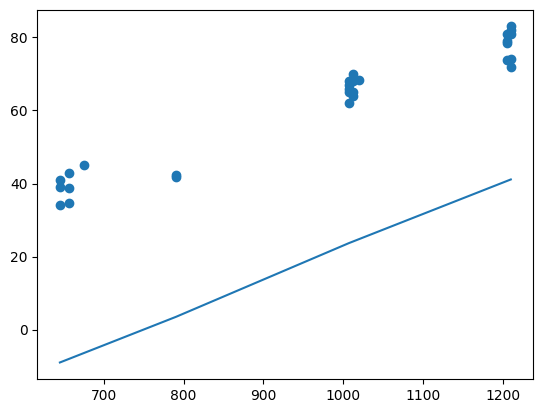

In [176]:
aray=[]
for i in range(len(test)):
    aray.append(predict_price(test.loc[i].location,test.loc[i].total_sqft,test.loc[i].bath,test.loc[i].bhk))
plt.scatter(test['total_sqft'],test['price'])

plt.plot(test['total_sqft'],aray)

In [183]:
import pickle
with open('bengaluru_house_prices','wb') as f:
    pickle.dump(lr,f)

    
    

In [184]:
with open('bengaluru_house_prices','rb') as f:
    model=pickle.load(f)


In [193]:
def predict_price_m(location,sqft,bath,bhk):
    index=np.where(x.columns==location)[0][0]
    #index=x.columns.tolist().index(location)
    length=(len(x.columns))
    default_list = [False] * length
    
    default_list[0]=sqft
    default_list[1]=bath
    default_list[2]=bhk
    default_list[3]=True
    
    if index>=0:
        default_list[index]=True   
    return model.predict([default_list])[0]
    

In [192]:
predict_price_m('Indira Nagar', 1000.000 , 3.0 , 3 )

C:\Users\Personal's PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([149.84161357])

In [190]:
import json
file={
    'data_col':[m.lower() for m in x.columns]
}
with open('columns.json','w') as fi:
    fi.write(json.dumps(file))

In [196]:
import os

# Get the current working directory
current_dir = os.getcwd()

print(current_dir)
# Navigate back one level
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

new =parent_dir+'\\movies'

print(new)


C:\Users\Personal's PC\Desktop
C:\Users\Personal's PC
C:\Users\Personal's PC\movies
